# Notebook de estudos do Gustavo Lima

## 1. Importação de bibliotecas

In [1]:
import pandas as pd              # Usada para manipulação de dados em formato de tabela
import numpy as np               # Operações matemáticas e arrays numéricos

import matplotlib.pyplot as plt  # Geração de gráficos simples
import seaborn as sns            # Gráficos estatísticos mais elaborados

# Módulos do scikit-learn para machine learning
from sklearn.model_selection import train_test_split               # Divisão de dados em treino e teste
from sklearn.preprocessing import LabelEncoder, StandardScaler     # Codificação e padronização dos dados
from sklearn.ensemble import RandomForestClassifier                # Modelo Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Métricas de avaliação

## 2. Carregamento dos dados

In [2]:
# Lê o dataset de churn
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Visualiza as primeiras linhas do dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Análise exploratória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


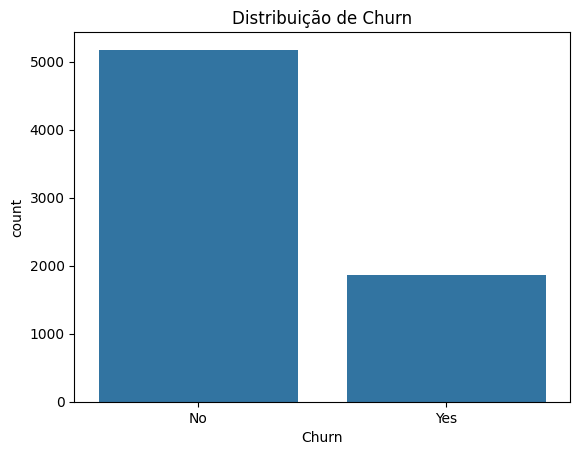

In [3]:
# Verifica estrutura dos dados: tipos de colunas, nulos, etc.
df.info()

# Estatísticas descritivas (média, min, max, etc.)
df.describe()

# Frequência dos valores da variável alvo (Churn)
print(df['Churn'].value_counts(normalize=True))

# Gráfico da distribuição de churn
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

## 4. Limpeza e tratamento

In [4]:
# Remove coluna ID que não agrega valor à predição
df = df.drop(columns=['customerID'])

# Verifica valores nulos
print(df.isnull().sum())

# Converte TotalCharges de texto para número (alguns registros estão como string vazia)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Preenche valores ausentes com a mediana
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 5. Codificação de variáveis categóricas

In [ ]:
# Identifica colunas categóricas
cat_cols = df.select_dtypes(include='object').columns

# Inicializa o codificador para variáveis binárias
le = LabelEncoder()

# Aplica codificação adequada
for col in cat_cols:
    if df[col].nunique() == 2:
        # Label Encoding para variáveis com 2 categorias (binárias)
        df[col] = le.fit_transform(df[col])
    else:
        # One-Hot Encoding para variáveis com mais de 2 categorias
        df = pd.get_dummies(df, columns=[col], drop_first=True)

KeyError: "['customerID'] not found in axis"

## 5. Codificação de variáveis categóricas

In [ ]:
# Identifica colunas categóricas
cat_cols = df.select_dtypes(include='object').columns

# Inicializa o codificador para variáveis binárias
le = LabelEncoder()

# Aplica codificação adequada
for col in cat_cols:
    if df[col].nunique() == 2:
        # Label Encoding para variáveis com 2 categorias (binárias)
        df[col] = le.fit_transform(df[col])
    else:
        # One-Hot Encoding para variáveis com mais de 2 categorias
        df = pd.get_dummies(df, columns=[col], drop_first=True)

## 6. Separação das variáveis

In [ ]:
# Define variável alvo
y = df['Churn']

# Define variáveis explicativas
X = df.drop('Churn', axis=1)

## 7. Divisão treino/teste

In [ ]:
# Divide os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8. Padronização dos dados

In [ ]:
# Padroniza os dados para média 0 e desvio 1
scaler = StandardScaler()

# Aplica a padronização
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9. Treinamento do modelo

In [ ]:
# Instancia o modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Treina o modelo com os dados de treino
model.fit(X_train, y_train)

## 10. Avaliação do modelo

In [ ]:
# Faz previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliação de acurácia (porcentagem de acertos)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Exibe métricas detalhadas: precisão, recall, f1-score
print(classification_report(y_test, y_pred))

# Matriz de confusão (visualiza erros e acertos)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Avaliação do Modelo de Churn')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## 11. Importância das variáveis

In [ ]:
# Gera gráfico das 10 variáveis mais importantes
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Mais Importantes para o Churn')
plt.xlabel('Importância')
plt.show()